In [94]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [95]:
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [131]:
Ocy3_S002=pd.read_excel(r'C:\ZL\Google drive syn\Research\manuscript writing\Harvesting efficiency\Harvesting report\Harvesting paper\Data\Python regression analysis\data combine\Ocy03+S002_clean_reggression.xlsx')

In [132]:
Ocy3_S002.columns.values

array(['Ocy03', 'S002', 'Days', 'PAR', 'insituoC', 'pH(harvest)',
       'Turbidity_GrowthRate(1/d)', 'PercentAsh_Cells(Final)',
       'Turbidity_initial(NTU)', 'DW_final(g/L)',
       ' Harvesting Efficiency'], dtype=object)

In [133]:
## model optimization
Ocy3_S002=Ocy3_S002.drop(columns=['insituoC','Turbidity_GrowthRate(1/d)','DW_final(g/L)','Turbidity_initial(NTU)'])

In [134]:
Ocy3_S002.head()

,Ocy03,S002,Days,PAR,pH(harvest),PercentAsh_Cells(Final),Harvesting Efficiency
0,1,0,4,53.109300,6.29,0.331111,85.396825
1,1,0,4,38.060250,6.47,0.146693,74.729242
2,1,0,3,52.337625,6.53,0.303223,66.150442
3,1,0,3,50.590725,6.83,0.107224,69.867550
4,1,0,3,52.181400,8.80,0.237153,78.093645


In [135]:
target=np.where(Ocy3_S002[' Harvesting Efficiency'] > 60, 1, 0)

In [136]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [137]:
unscaled_input=Ocy3_S002.iloc[:,:-1]

In [138]:
display(unscaled_input)

,Ocy03,S002,Days,PAR,pH(harvest),PercentAsh_Cells(Final)
0,1,0,4,53.109300,6.29,0.331111
1,1,0,4,38.060250,6.47,0.146693
2,1,0,3,52.337625,6.53,0.303223
3,1,0,3,50.590725,6.83,0.107224
4,1,0,3,52.181400,8.80,0.237153
5,1,0,3,57.034275,9.25,0.415916
6,1,0,3,57.109125,9.63,0.309800
7,1,0,2,55.241750,8.77,0.246268
8,1,0,3,38.336363,9.36,0.062525
9,1,0,3,29.815350,9.46,0.081171


In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [141]:
columns_to_omit =['Ocy03','S002']
columns_to_scale = [x for x in unscaled_input.columns.values if x not in columns_to_omit]
columns_to_scale

['Days', 'PAR', 'pH(harvest)', 'PercentAsh_Cells(Final)']

In [142]:
flocculation_scaler = CustomScaler(columns_to_scale)

In [143]:
flocculation_scaler.fit(unscaled_input)

CustomScaler(columns=['Days', 'PAR', 'pH(harvest)', 'PercentAsh_Cells(Final)'],
       copy=None, with_mean=None, with_std=None)

In [144]:
scaled_inputs = flocculation_scaler.transform(unscaled_input)

In [145]:
scaled_inputs 

,Ocy03,S002,Days,PAR,pH(harvest),PercentAsh_Cells(Final)
0,1,0,2.062572,0.461011,-3.060399,-0.598413
1,1,0,2.062572,-1.567068,-2.858614,-1.065131
2,1,0,0.183340,0.357016,-2.791353,-0.668991
3,1,0,0.183340,0.121596,-2.455045,-1.165018
4,1,0,0.183340,0.335963,-0.246626,-0.836199
5,1,0,0.183340,0.989958,0.257836,-0.383792
6,1,0,0.183340,1.000045,0.683825,-0.652346
7,1,0,-1.695892,0.748389,-0.280256,-0.813131
8,1,0,0.183340,-1.529857,0.381149,-1.278141
9,1,0,0.183340,-2.678188,0.493251,-1.230952


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [148]:
print (x_train.shape, y_train.shape)

(32, 6) (32,)


In [149]:
print (x_test.shape, y_test.shape)

(9, 6) (9,)


In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [151]:
reg = LogisticRegression()

In [152]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [153]:
reg.score(x_train,y_train)

0.9375

In [154]:
reg.score(x_test,y_test)

0.8888888888888888

In [155]:
feature_name = scaled_inputs.columns.values

In [156]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,Ocy03,0.780600
1,S002,0.493928
2,Days,0.657715
3,PAR,0.447197
4,pH(harvest),-0.345017
5,PercentAsh_Cells(Final),-1.092899


In [157]:
summary_table=summary_table.sort_values('Coefficient', ascending=True)

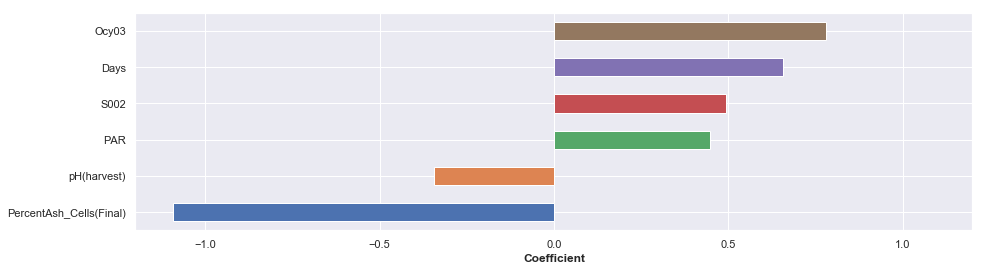

In [159]:
ax=summary_table.plot.barh(x='Feature name', y='Coefficient',figsize=(15,4))
ax.get_legend().remove()
ax.set_ylabel('')
plt.xlim(-1.2,1.2)
ax.set_xlabel('Coefficient',fontweight='bold')
plt.savefig(r'C:\ZL\Personal\Green Card\Dropbox\Harvesting paper\ML\Flocculation_based.png',dpi = 900)
plt.savefig(r'C:\ZL\Personal\Green Card\Dropbox\Harvesting paper\ML\Flocculation_based.jpg',dpi = 900)
plt.show()